# Fall 2022 Data Science Intern Challenge
### Nargish Padaniya
### 12/06/2022

Question 1: Given some sample data, write a program to answer the following: On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

we will load the data and see the summary of the dataset to get the idea

In [2]:
import pandas as pd

data = pd.read_csv("/Users/nargishpadaniya/Downloads/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")

In [3]:
data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


## a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

We can see from the above summary output that the mean of the total order amount is 3145.128, which might be the source of the initial AOV indicated in the question. According to the Shopify website's description of AOV, the calculation is TotalOrderAmount/TotalNumberofOrders, we can see below:

In [4]:
TotalOrderAmount = sum(data['order_amount'])
TotalNumberofOrders = data.count()
AOV = TotalOrderAmount/TotalNumberofOrders

In [5]:
AOV

order_id          3145.128
shop_id           3145.128
user_id           3145.128
order_amount      3145.128
total_items       3145.128
payment_method    3145.128
created_at        3145.128
dtype: float64

As we can see there is a mistake here as we can see in the summary that 75% of the order amount is under $ 390 and the mistake maybe caused due to an outlier. Lets check for an outlier

<function matplotlib.pyplot.show(close=None, block=None)>

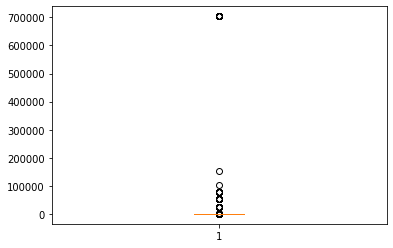

In [6]:
import matplotlib.pyplot as plt

plt.boxplot(data['order_amount'])
plt.show

we will also see the maximum order amount values

In [8]:
from pandas import DataFrame
data1 = DataFrame(data)

test = data1.sort_values(['order_amount'], ascending=[False])
test.head(20)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
4882,4883,42,607,704000,2000,credit_card,2017-03-25 4:00:00


In [32]:
d1 = data[data['order_amount']<= 10000]

In [33]:
d1

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


<function matplotlib.pyplot.show(close=None, block=None)>

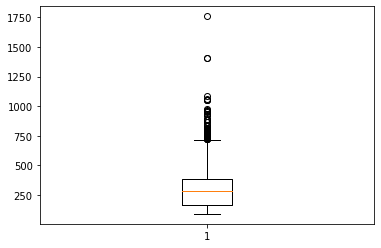

In [34]:
plt.boxplot(d1['order_amount'])
plt.show

we can see there is outliers that was oder amount above 10000 dollars and that were affecting the AOV. Now we can see that AOV would have changed.

In [35]:
TotalOrderAmount = sum(d1['order_amount'])
TotalNumberofOrders = d1.count()
newAOV = TotalOrderAmount/TotalNumberofOrders

In [36]:
newAOV

order_id          302.580514
shop_id           302.580514
user_id           302.580514
order_amount      302.580514
total_items       302.580514
payment_method    302.580514
created_at        302.580514
dtype: float64

In [37]:
import statistics
 
statistics.median(data['order_amount'])

284.0

In [38]:
statistics.median(d1['order_amount'])

284

From the above analysis we can say the outlier causes the problem and can lead in getting an wrong AOV value. After removing an outlier we can see that we got the new AOV value really small of $ 302.58 and the median have not changed before also it was 284 and after also 284. So removing the outlier is one solution.

## What metric would you report for this dataset?

1. Getting the average value of the data after removing the extreme outliers
2. Getting the AOV value after removing the extreme outliers
3. Getting median value before and after removing the extreme outliers

## Values

1. Getting the average value of the data after removing the extreme outliers

In [39]:
statistics.mean(d1['order_amount'])

302.58051448247926

2. getting the AOV value after removing the extreme outliers

In [41]:
TotalOrderAmount = sum(d1['order_amount'])
TotalNumberofOrders = d1.count()
newAOV = TotalOrderAmount/TotalNumberofOrders
newAOV['order_amount']

302.58051448247926

3. getting median value before and after removing the extreme outliers

In [43]:
print("before: ",statistics.median(data['order_amount']))
print("after: ",statistics.median(d1['order_amount']))

before:  284.0
after:  284


## Question 2

Question 2: For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

### How many orders were shipped by Speedy Express in total?

SELECT a.ShipperName, COUNT(DISTINCT b.OrderID) as TotalOrders
FROM Orders as b
LEFT JOIN Shippers as a
ON b.ShipperID = a.ShipperID
WHERE ShipperName = "Speedy Express";

54 orders were shipped by speedy express

### What is the last name of the employee with the most orders?

SELECT a.LastName, COUNT(DISTINCT b.OrderID) as TotalOrders
FROM Orders as b
LEFT JOIN Employees as a
ON b.EmployeeID = a.EmployeeID
GROUP BY a.LastName
ORDER BY TotalOrders DESC
LIMIT 1

40 orders by employee with Peacock as lastname

### What product was ordered the most by customers in Germany?

SELECT a.ProductName, SUM(b.Quantity) as TotalQuan
FROM Orders as d
JOIN Customers as c
  ON c.CustomerID = d.CustomerID
JOIN OrderDetails as b
  ON d.OrderID = b.OrderID
JOIN Products as a
  ON b.ProductID = a.ProductID
WHERE c.Country = 'Germany'
GROUP BY ProductName
ORDER BY TotalQuan DESC
LIMIT 1;

Boston Crab Meat was most ordered product in Germany with Total order of 160.